<a href="https://colab.research.google.com/github/Krukrukk/Decision_tree_sklearn/blob/master/Decision_tree_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Maciej Małecki

# Decision Tree Classifice

## Inportand page:
 - https://www.kaggle.com/sangwookchn/classification-techniques-using-scikit-learn #dataset
 - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html #documentation
 

## Library

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import tree

## Importing the dataset

In [0]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [0]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [0]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [0]:
feature_names = list(dataset.columns.values)[2:4]
feature_names

['Age', 'EstimatedSalary']

In [0]:
dataset['Purchased'] = dataset['Purchased'].astype('category')

In [0]:
target_names = [str(name) for name in list(dataset['Purchased'].unique())]
target_names

['0', '1']

# Code

In [0]:
def decision_tree(X,y,criterion_tree='entropy', max_depth_tree=None, 
                  min_samples_leaf_tree = 2, splitters='best',
                  max_featuress=None):
    # Splitting the dataset into the Training set and Test set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                        random_state = 0)

    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test) 
    X_train.astype(float)
    X_test.astype(float)

    # Fitting classifier to the Training set
    # Create your classifier here
    from sklearn.tree import DecisionTreeClassifier
    classifier = DecisionTreeClassifier(criterion = criterion_tree, 
                                        max_depth = max_depth_tree,
                                        min_samples_leaf = min_samples_leaf_tree,
                                        random_state=0,
                                        splitter=splitters,
                                        max_features=max_featuress)
    classifier.fit(X_train, y_train)

    # Predicting the Test set results
    y_pred = classifier.predict(X_test)
    return X_train, X_test, y_train, y_test, y_pred, classifier

## Accuracy

In [0]:
def accuracy(y_test, y_pred):
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    accuracy = (cm[0,0] + cm[1,1])/np.sum(cm)*100
    print("Accuracy = " + str(accuracy) + "%")

## Visualisation training dataset

In [0]:
def visualisation_train(X_train, y_train, classifier):
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j, 
                    linewidths = 1, edgecolor = 'black')
    plt.title('Classifier (Training set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

## Visualisation test dataset

In [0]:
def visualisation_test(X_test, y_test, classifier):
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j,
                    linewidths = 1, edgecolor = 'black')
    plt.title('Classifier (Test set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

## Decision tree - block diagram

In [0]:
def draw_block(classifier, feature_names, target_names, criterion_tree, 
               max_depth_tree, min_samples_split_tree):
    import graphviz
    dot_data = tree.export_graphviz(classifier, out_file=None, 
                            feature_names=feature_names,  
                            class_names=target_names,  
                            filled=True, rounded=True,  
                            special_characters=True) 
    graph = graphviz.Source(dot_data)
    graph.render("Social_Network_"+str(criterion_tree)+"_"+
                str(max_depth_tree)+"_"+str(min_samples_split_tree)) 
    return graph

# Solution

In [0]:
def solution(X, y, criterion_tree='entropy', max_depth_tree=None, 
                  min_samples_leaf_tree = 2, splitter='best',
                  max_features=None):
    X_train, X_test, y_train, y_test, y_pred, classifier = decision_tree(X,y,criterion_tree, 
                                                                        max_depth_tree, 
                                                                        min_samples_leaf_tree,
                                                                        splitter,
                                                                        max_features)
    accuracy(y_test, y_pred)
    print('-'*80)
    visualisation_train(X_train, y_train, classifier)
    print('-'*80)
    visualisation_test(X_test, y_test, classifier)
    print('-'*80)
    graph = draw_block(classifier, feature_names, target_names, criterion_tree, 
               max_depth_tree, min_samples_leaf_tree)
    return graph

## for different depth

### max_depth = 2

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[[64  4]
 [ 2 30]]
Accuracy = 94.0%
--------------------------------------------------------------------------------


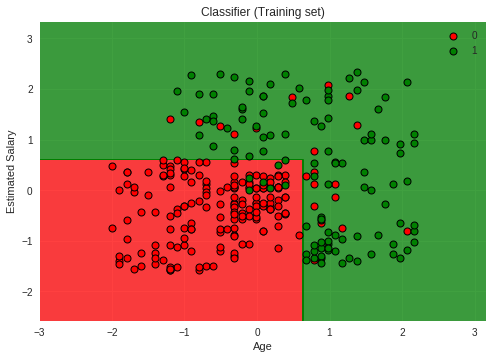

--------------------------------------------------------------------------------


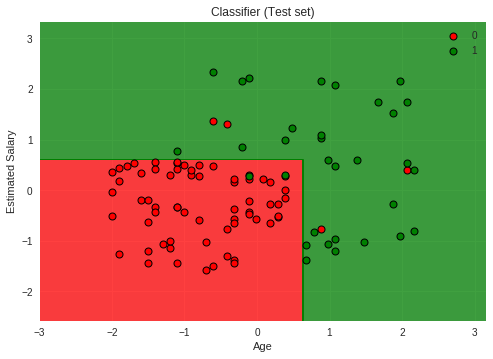

--------------------------------------------------------------------------------


In [0]:
graph = solution(X, y, max_depth_tree=2)

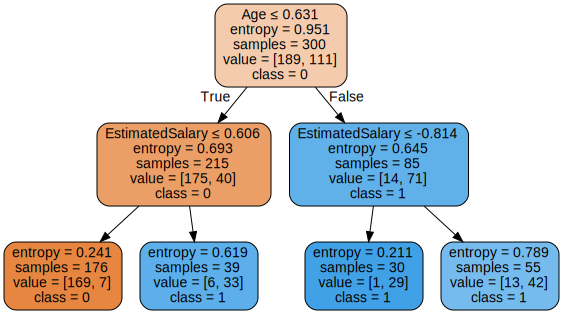

In [0]:
graph

### max_depth = 4

[[65  3]
 [ 4 28]]
Accuracy = 93.0%
--------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


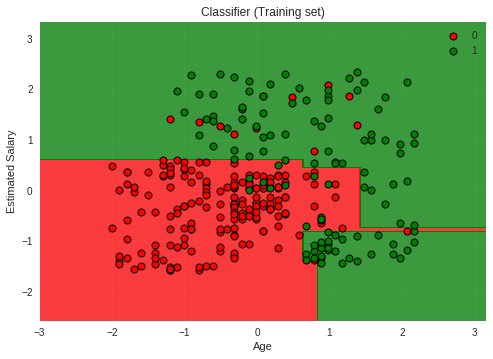

--------------------------------------------------------------------------------


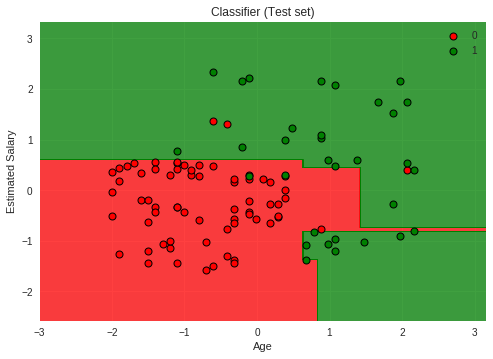

--------------------------------------------------------------------------------


In [0]:
graph = solution(X, y, max_depth_tree=4)

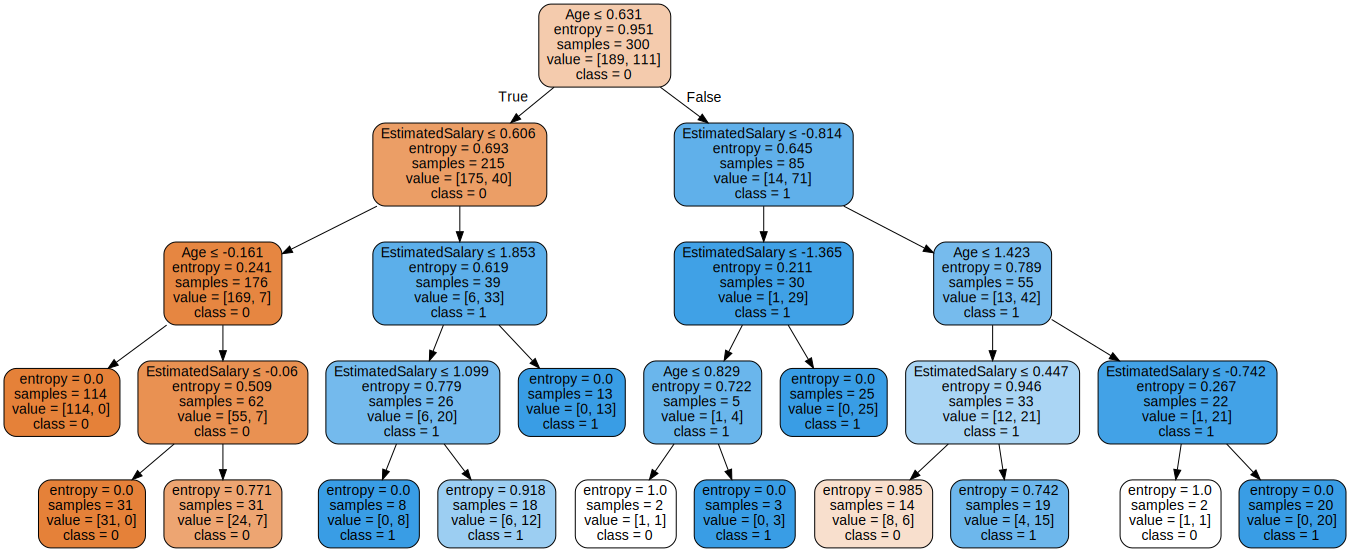

In [0]:
graph

### max_depth = 6

[[64  4]
 [ 6 26]]
Accuracy = 90.0%
--------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


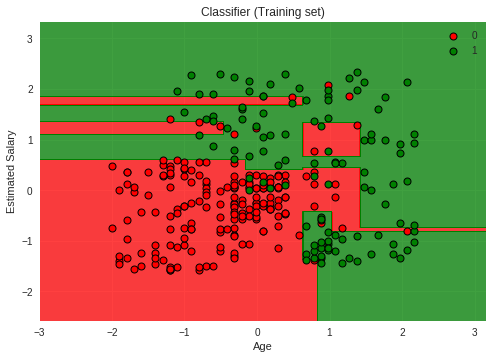

--------------------------------------------------------------------------------


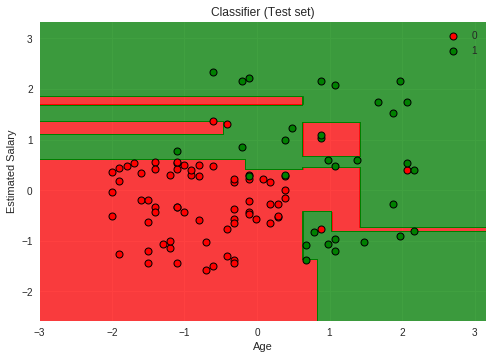

--------------------------------------------------------------------------------


In [0]:
graph = solution(X, y, max_depth_tree=6)

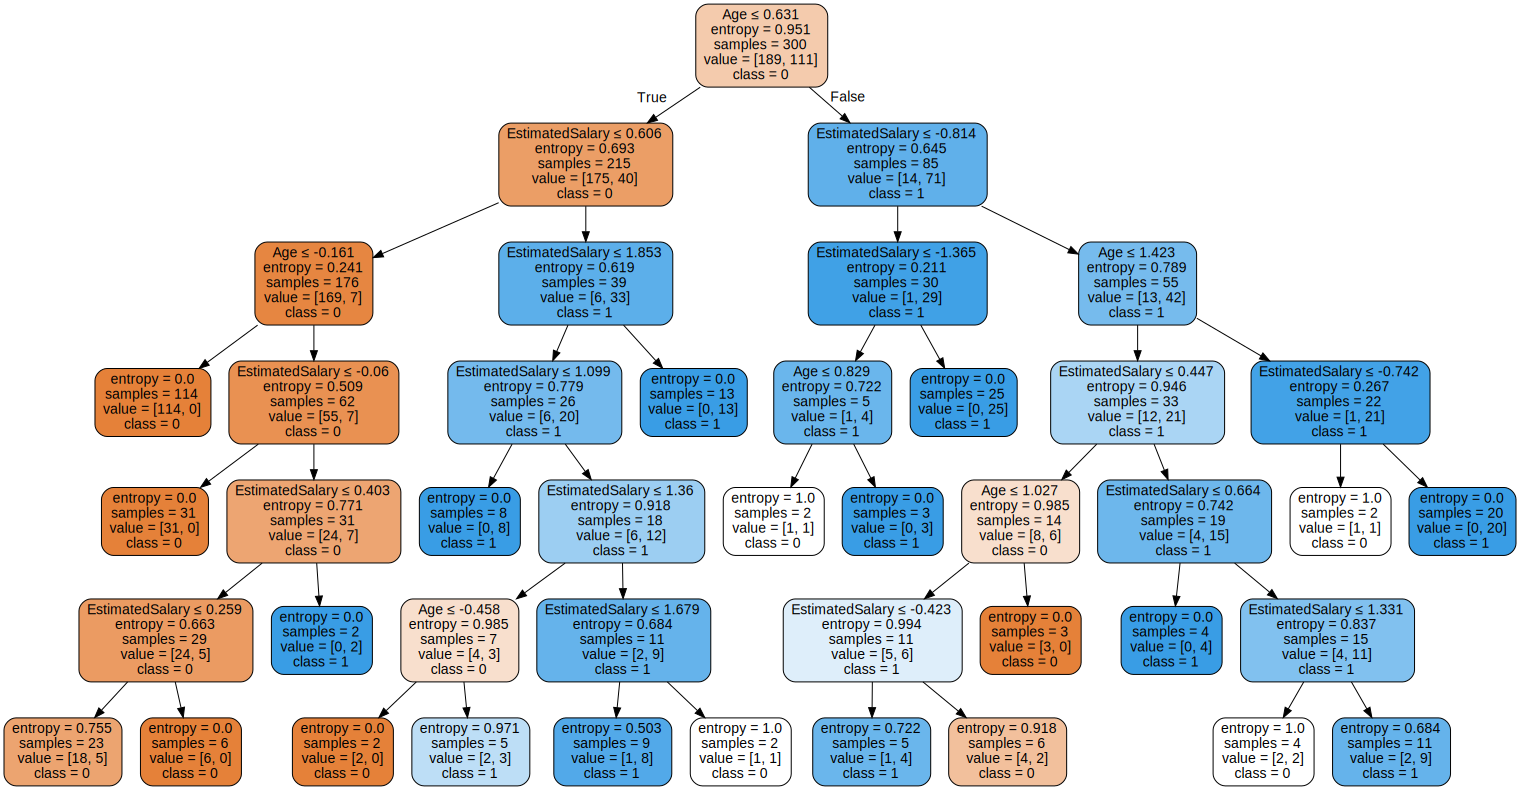

In [0]:
graph

### max_depth = None

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoid

[[64  4]
 [ 6 26]]
Accuracy = 90.0%
--------------------------------------------------------------------------------


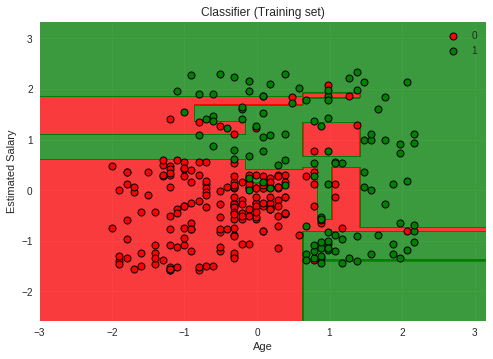

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


--------------------------------------------------------------------------------


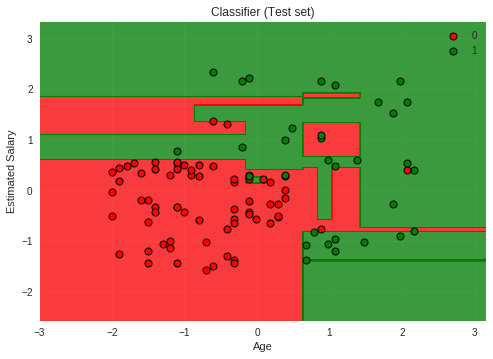

--------------------------------------------------------------------------------


In [0]:
graph = solution(X, y)

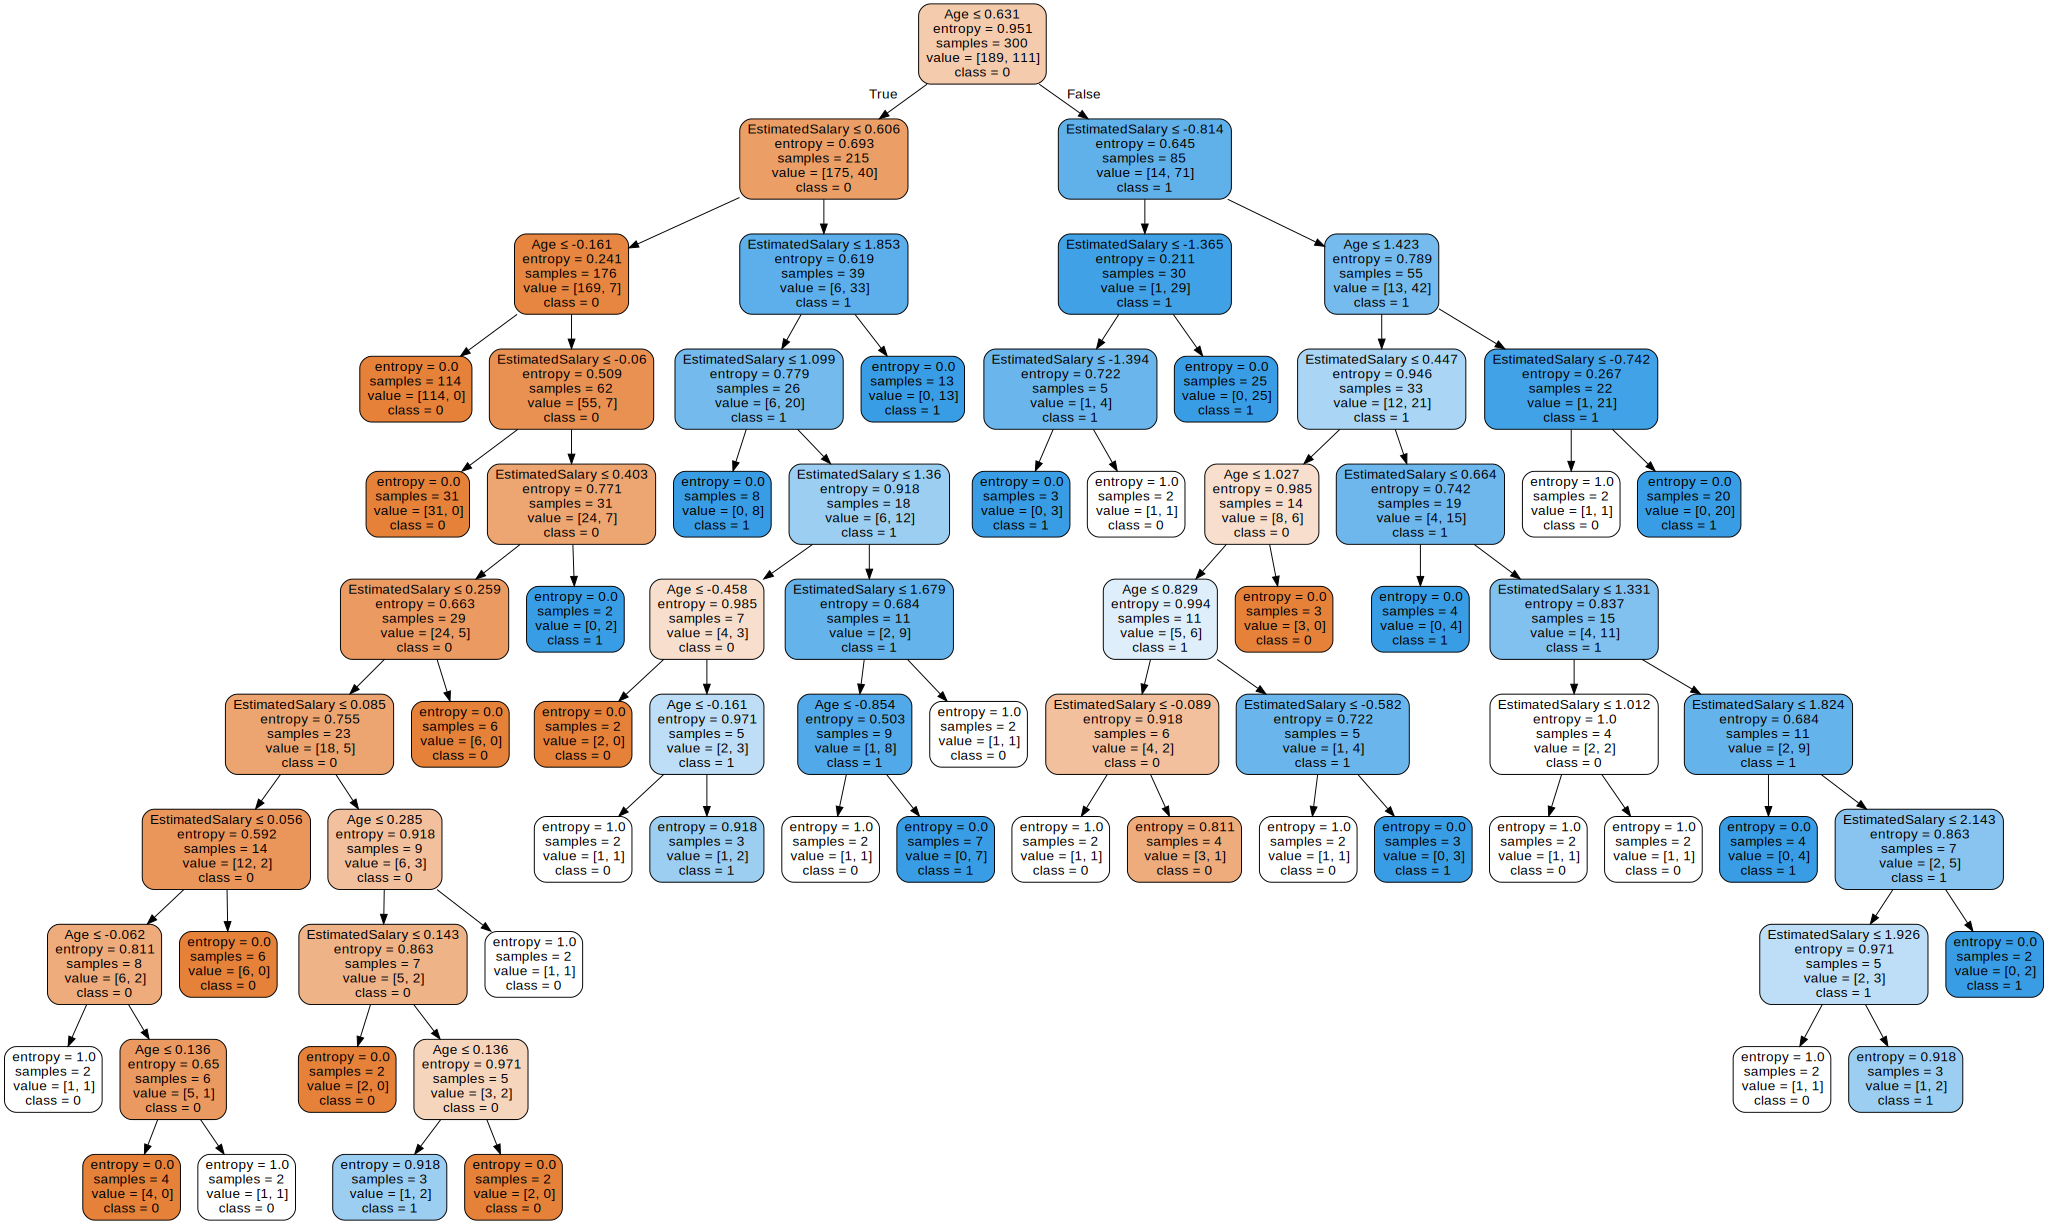

In [0]:
graph

## for diffrent criterion

### criterion = 'entropy'

[[64  4]
 [ 6 26]]
Accuracy = 90.0%
--------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


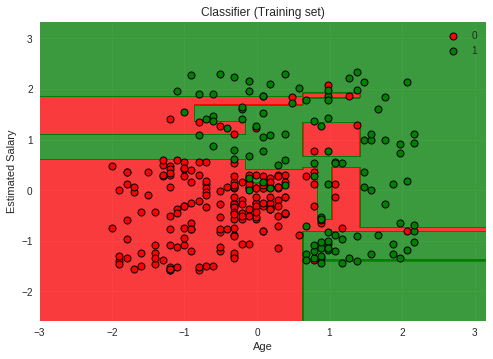

--------------------------------------------------------------------------------


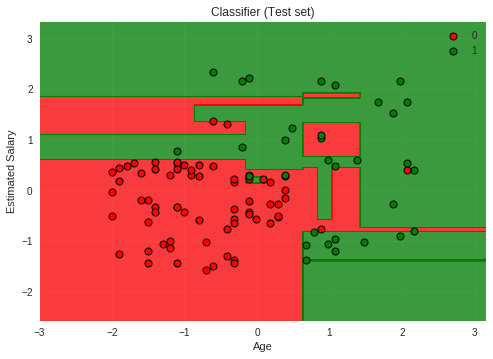

--------------------------------------------------------------------------------


In [0]:
graph = solution(X, y, criterion_tree='entropy')

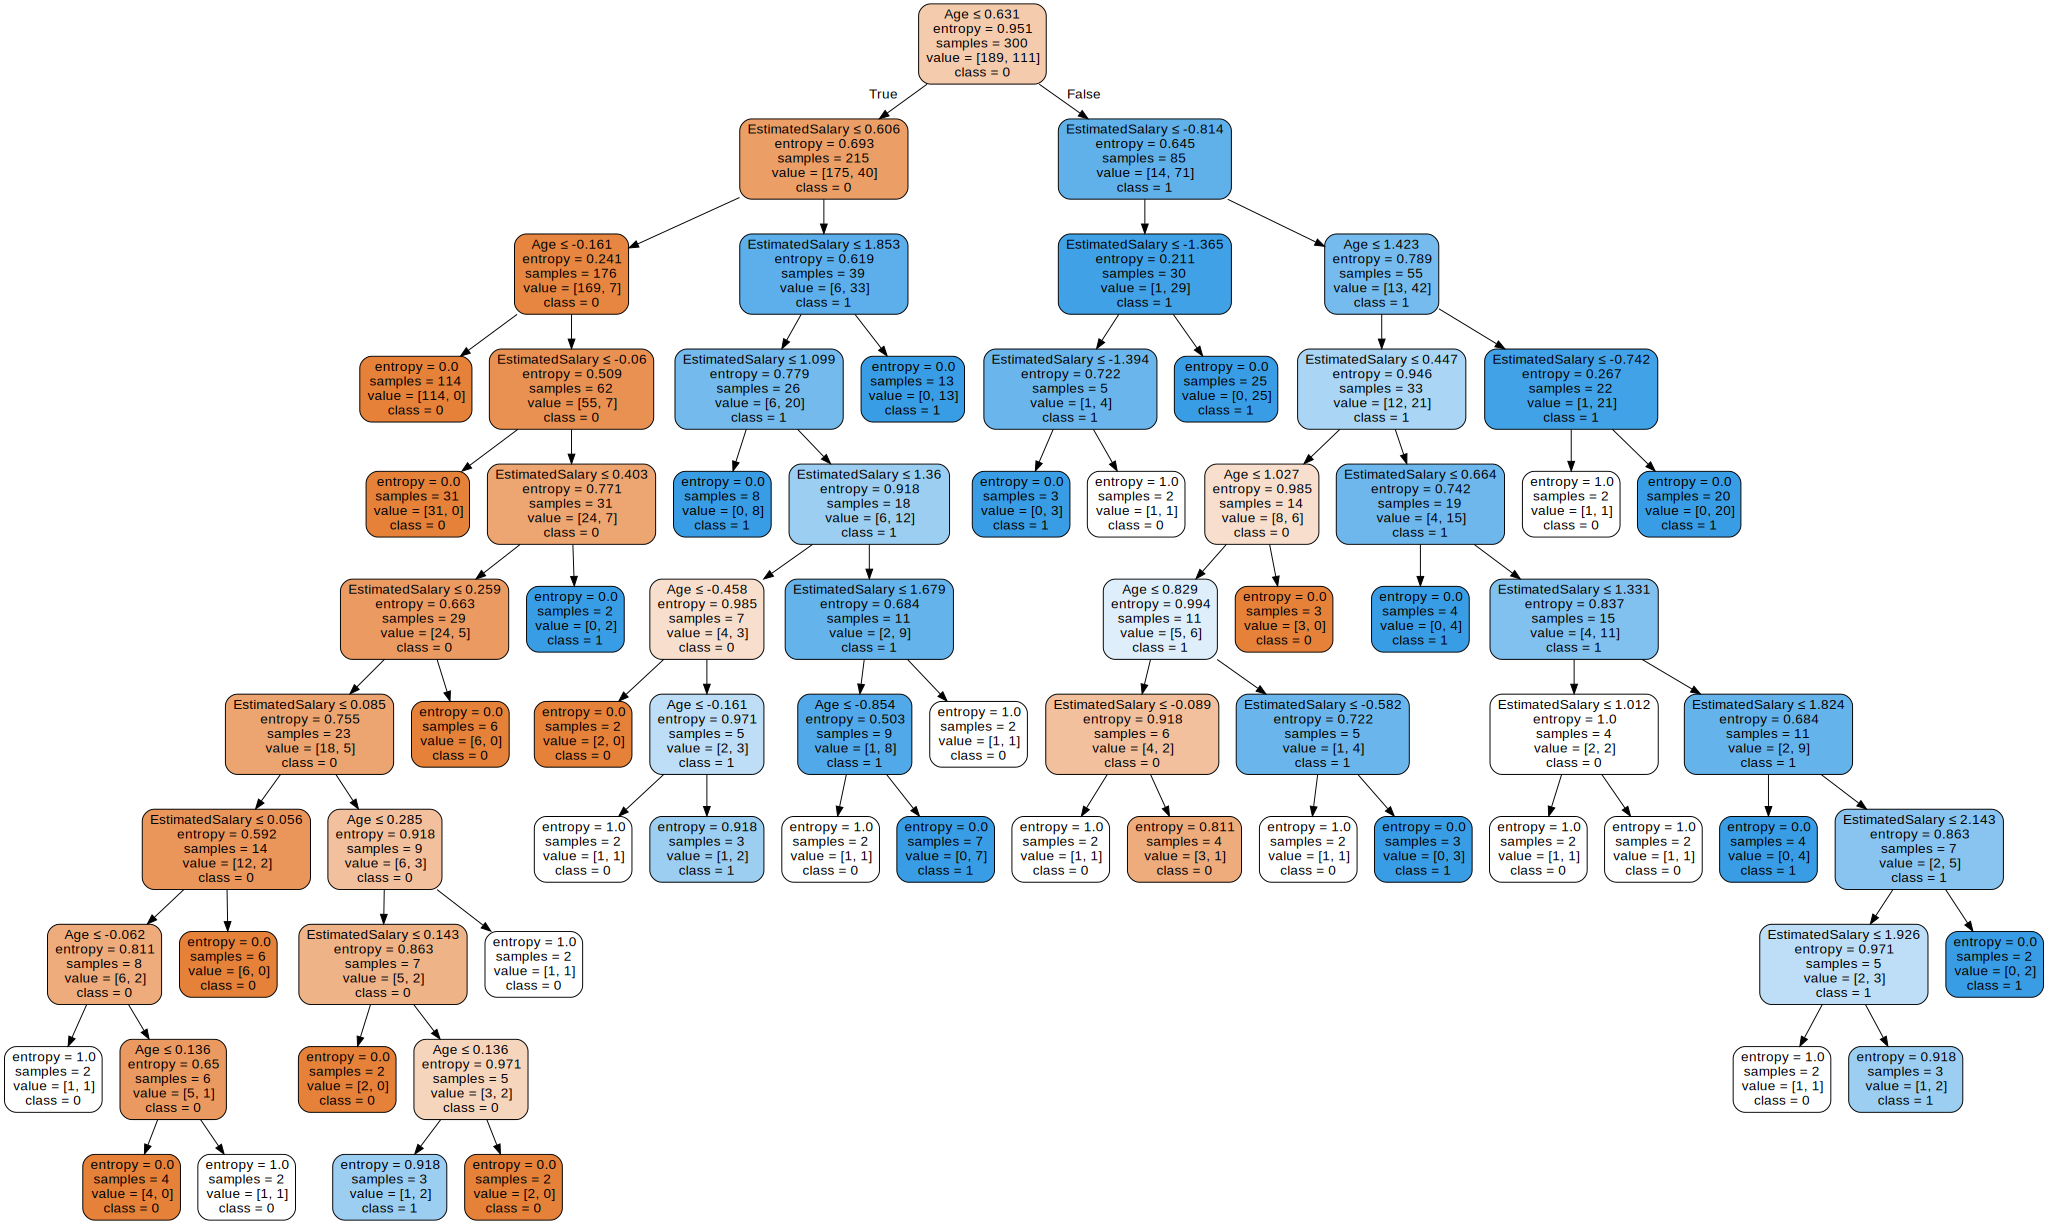

In [0]:
graph

### criterion = 'gini'

[[64  4]
 [ 6 26]]
Accuracy = 90.0%
--------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


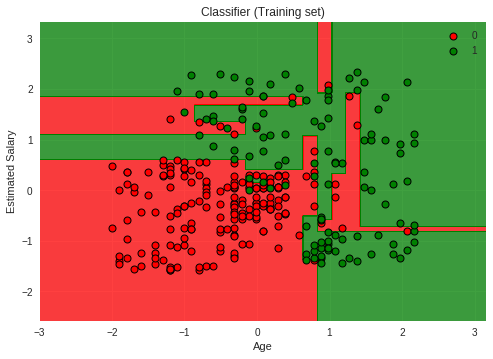

--------------------------------------------------------------------------------


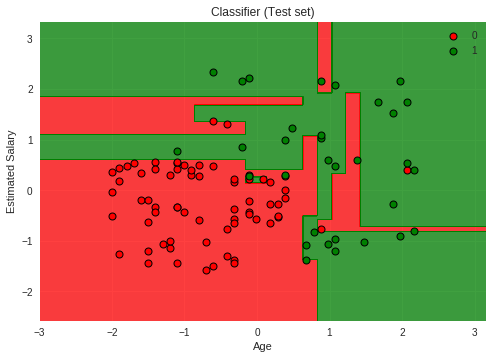

--------------------------------------------------------------------------------


In [0]:
graph = solution(X, y, criterion_tree='gini')

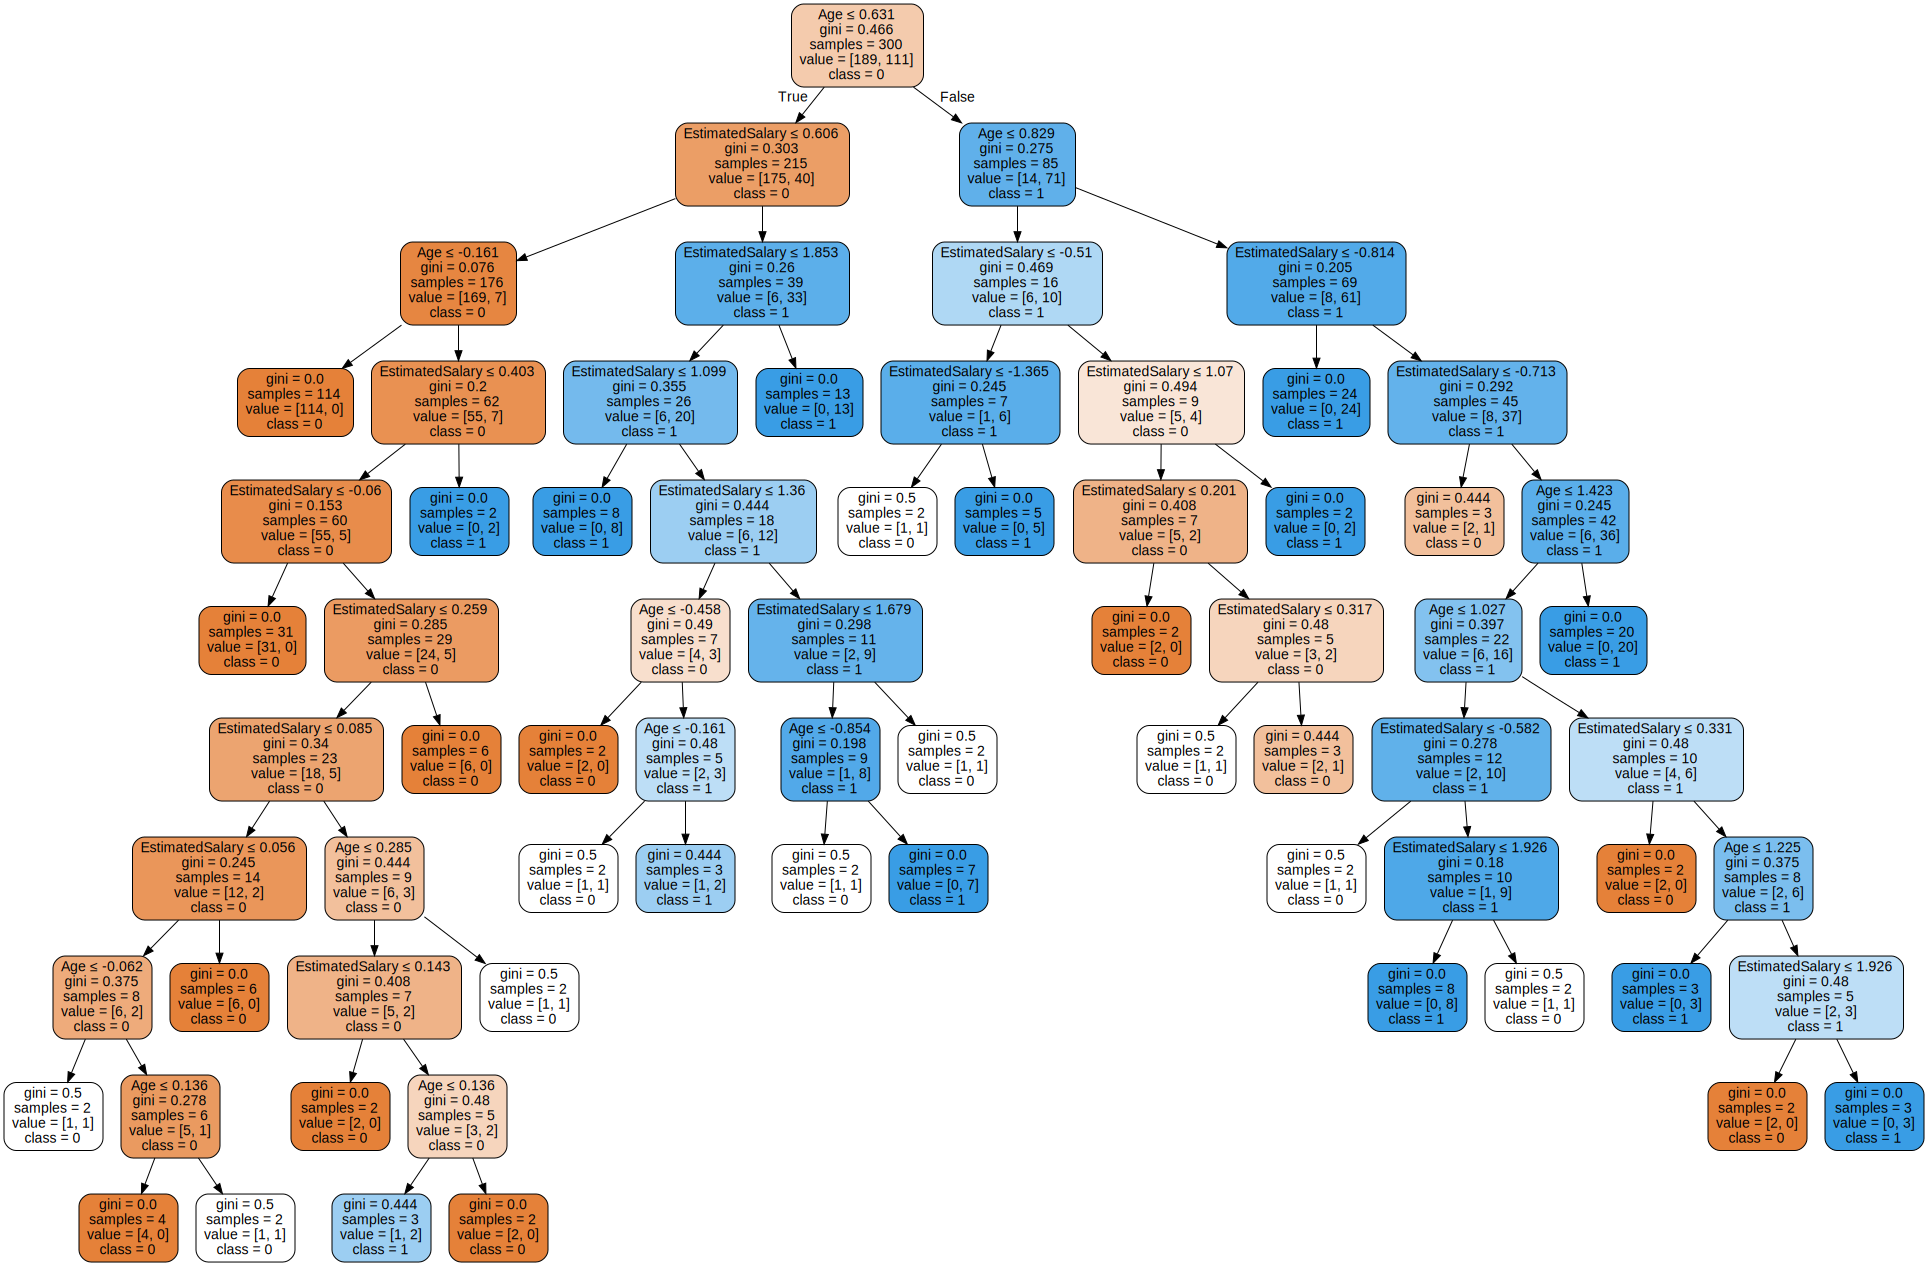

In [0]:
graph

## for diffrent splitter

### splitter = 'random'

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoid

[[64  4]
 [ 3 29]]
Accuracy = 93.0%
--------------------------------------------------------------------------------


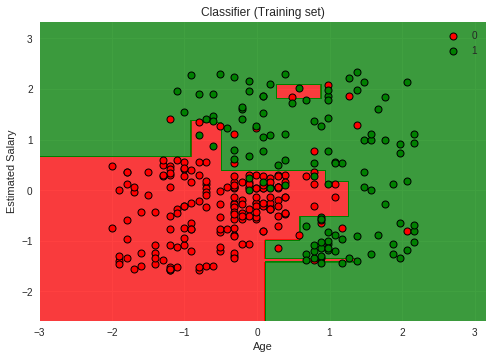

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


--------------------------------------------------------------------------------


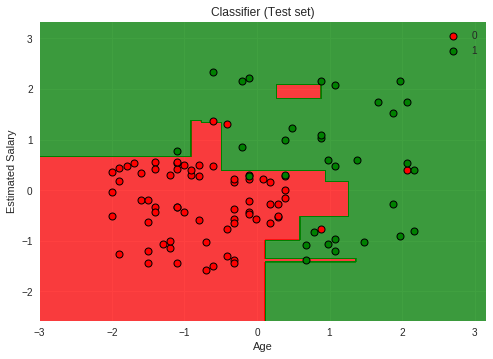

--------------------------------------------------------------------------------


In [0]:
graph = solution(X, y, splitter='random')

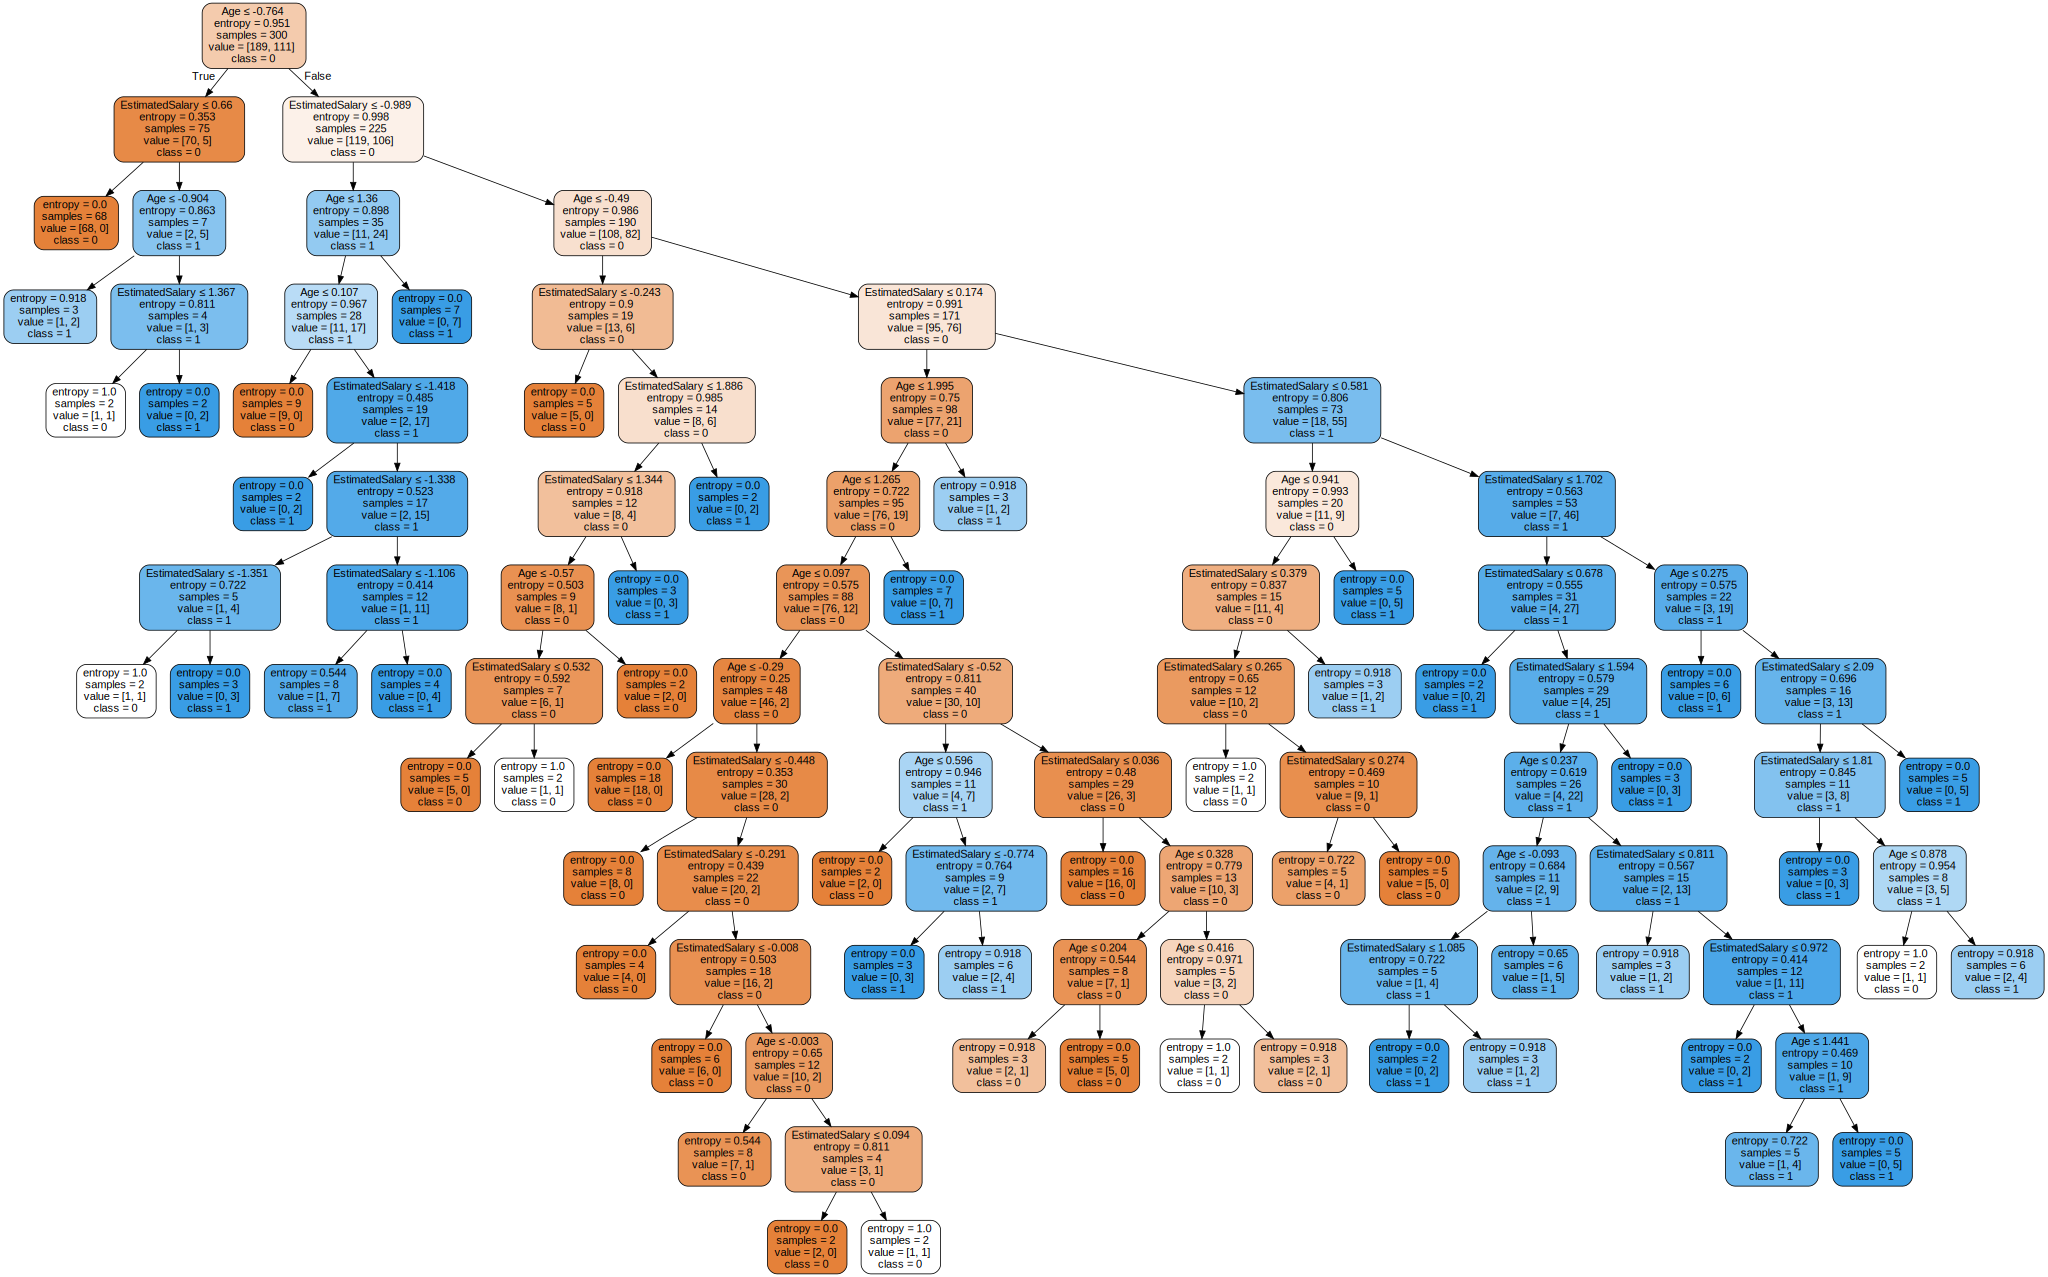

In [0]:
graph

## for diffrent max_features

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoid

[[67  1]
 [14 18]]
Accuracy = 85.0%
--------------------------------------------------------------------------------


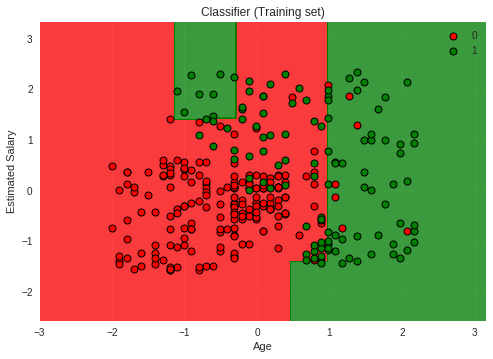

--------------------------------------------------------------------------------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


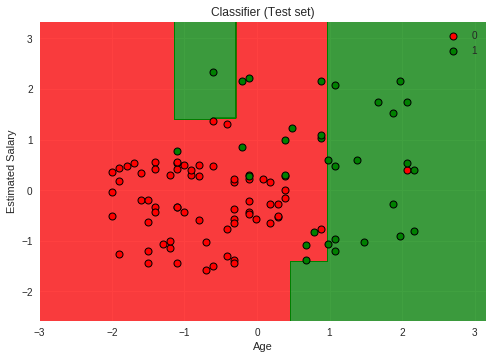

--------------------------------------------------------------------------------


In [0]:
graph = solution(X, y,max_depth_tree=6, max_features='auto', splitter='random')

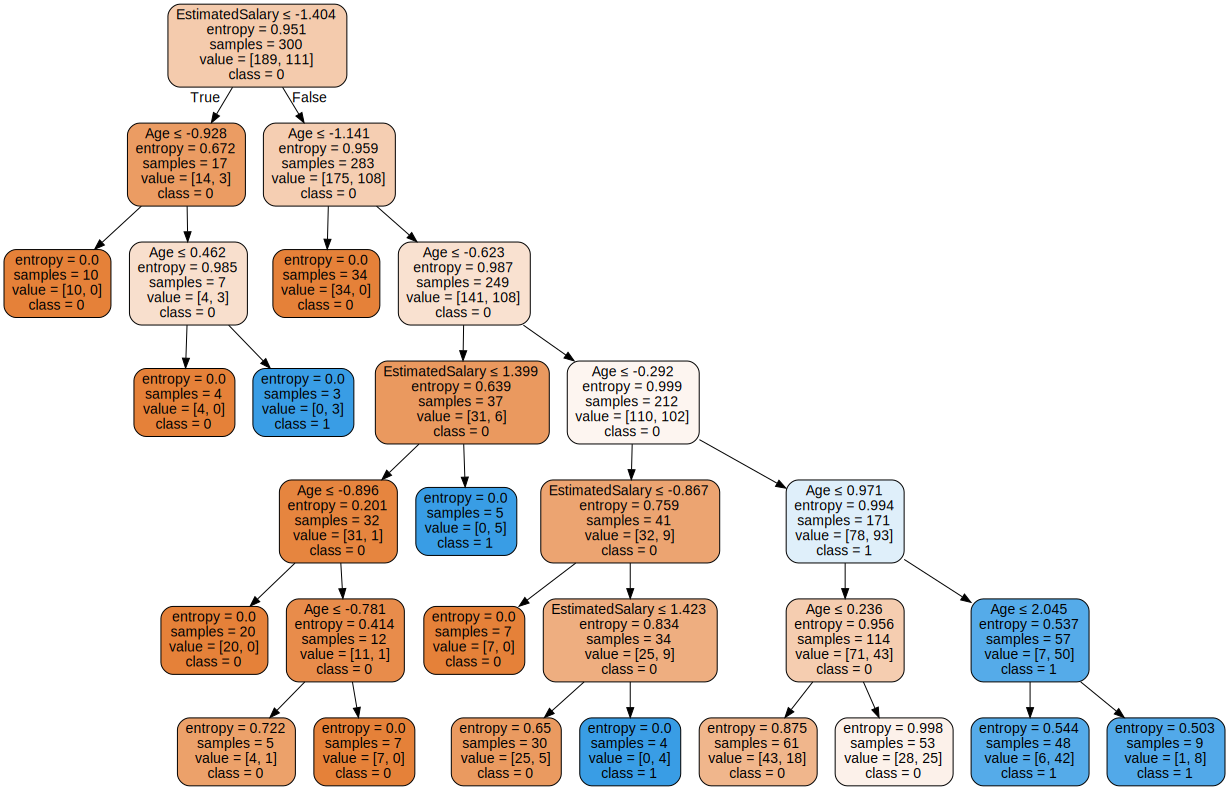

In [0]:
graph

### max_features='sqrt', splitter='random'

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoid

[[66  2]
 [ 6 26]]
Accuracy = 92.0%
--------------------------------------------------------------------------------


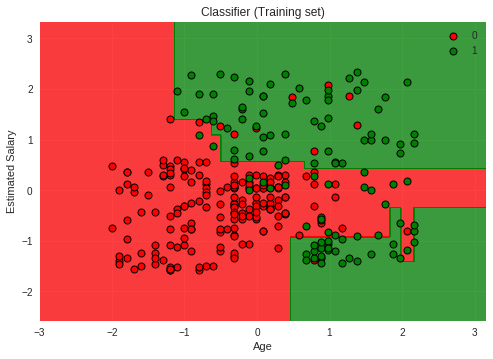

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


--------------------------------------------------------------------------------


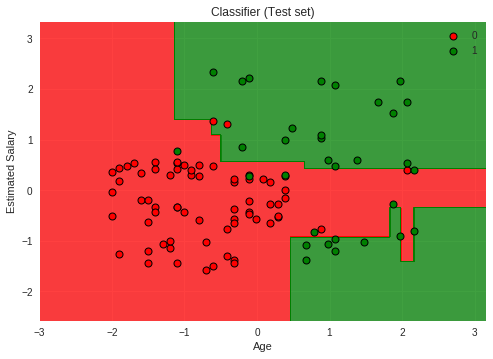

--------------------------------------------------------------------------------


In [0]:
graph = solution(X, y, max_features='sqrt', splitter='random', max_depth_tree=10)

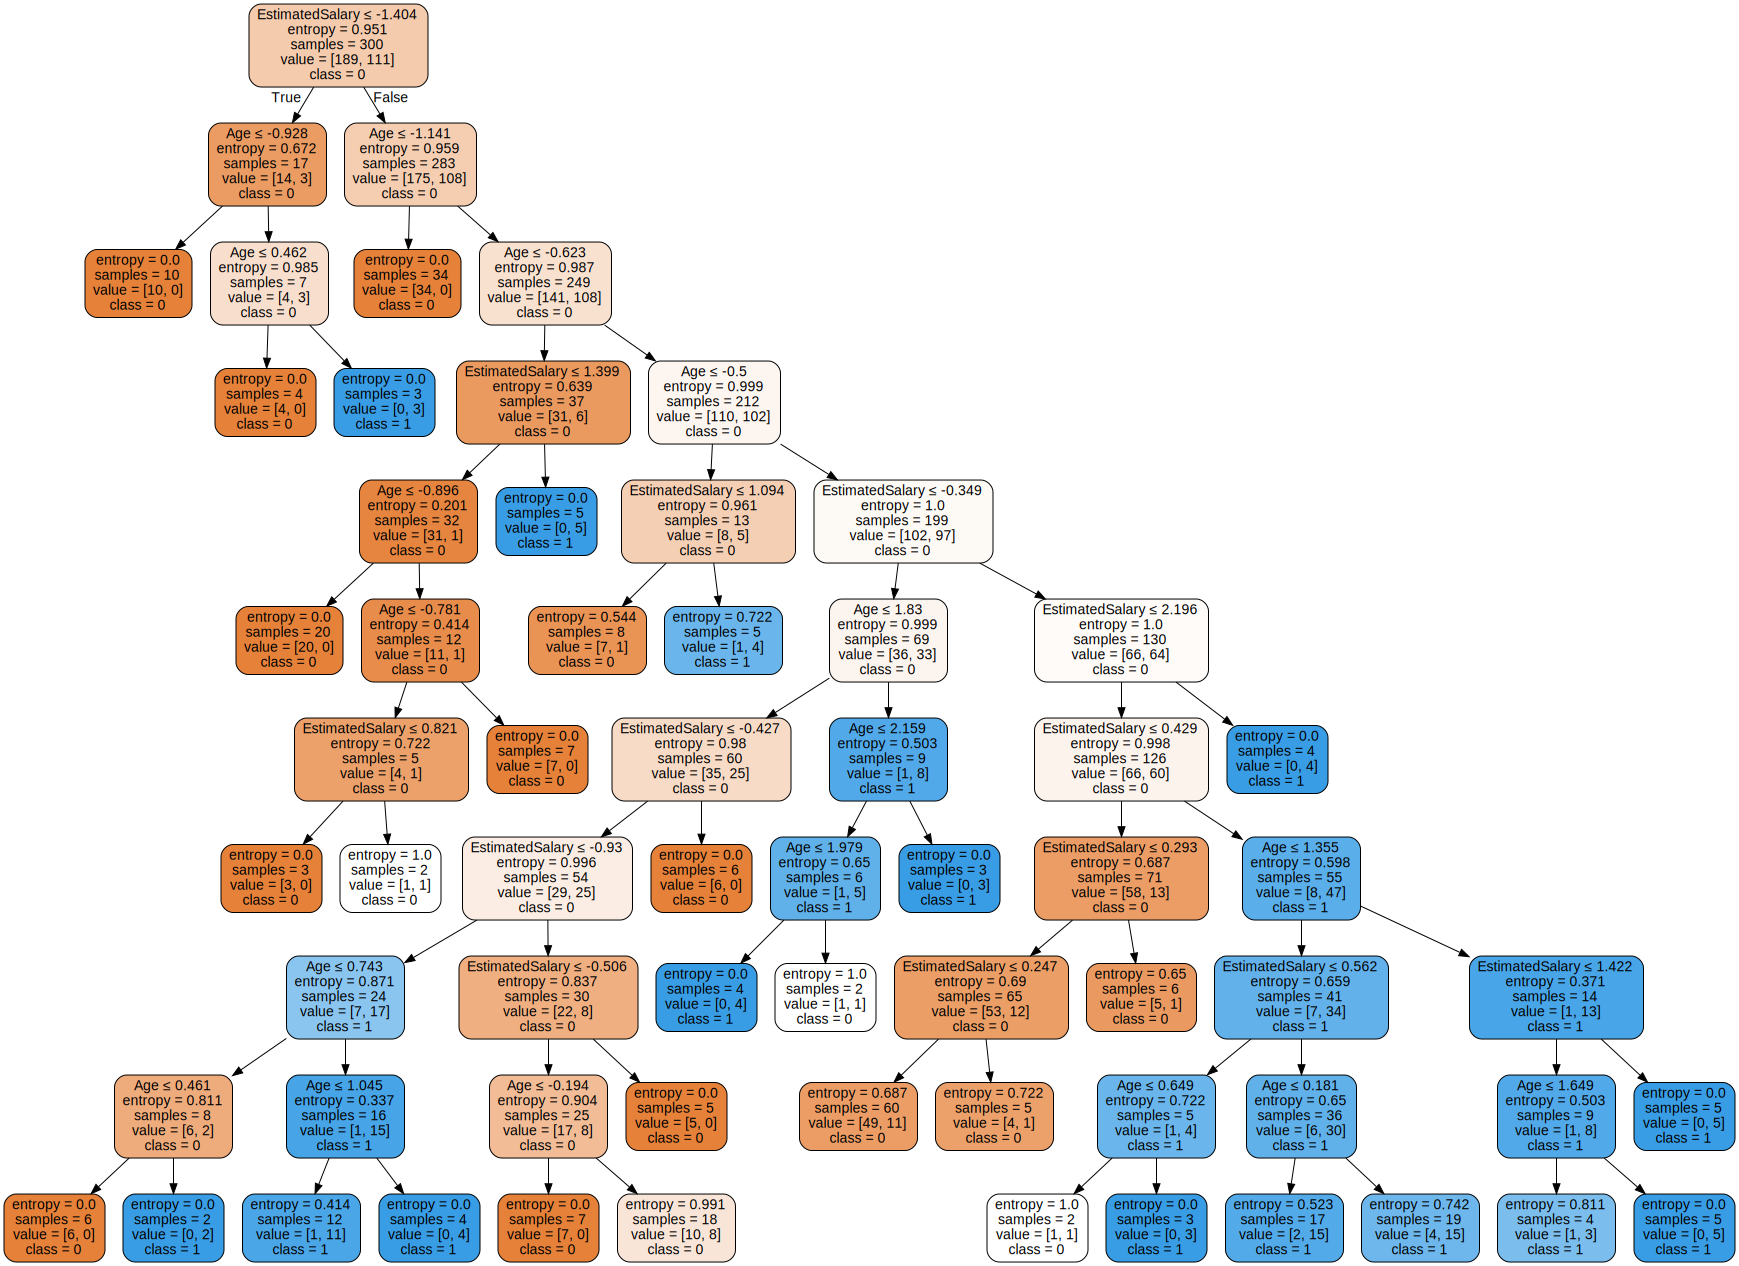

In [0]:
graph

### max_features = "log2"



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoid

[[66  2]
 [ 6 26]]
Accuracy = 92.0%
--------------------------------------------------------------------------------


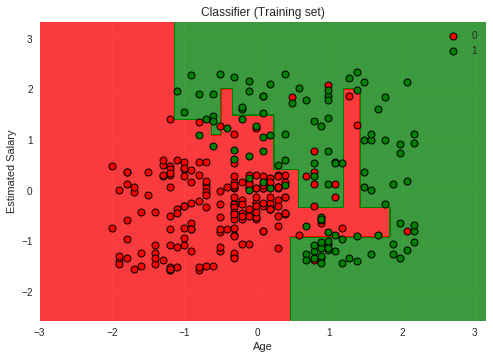

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


--------------------------------------------------------------------------------


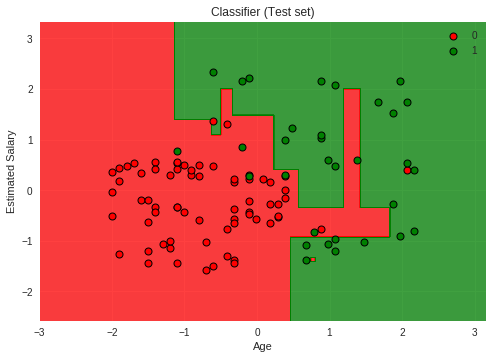

--------------------------------------------------------------------------------


In [0]:
graph = solution(X, y, max_features='log2', splitter='random')

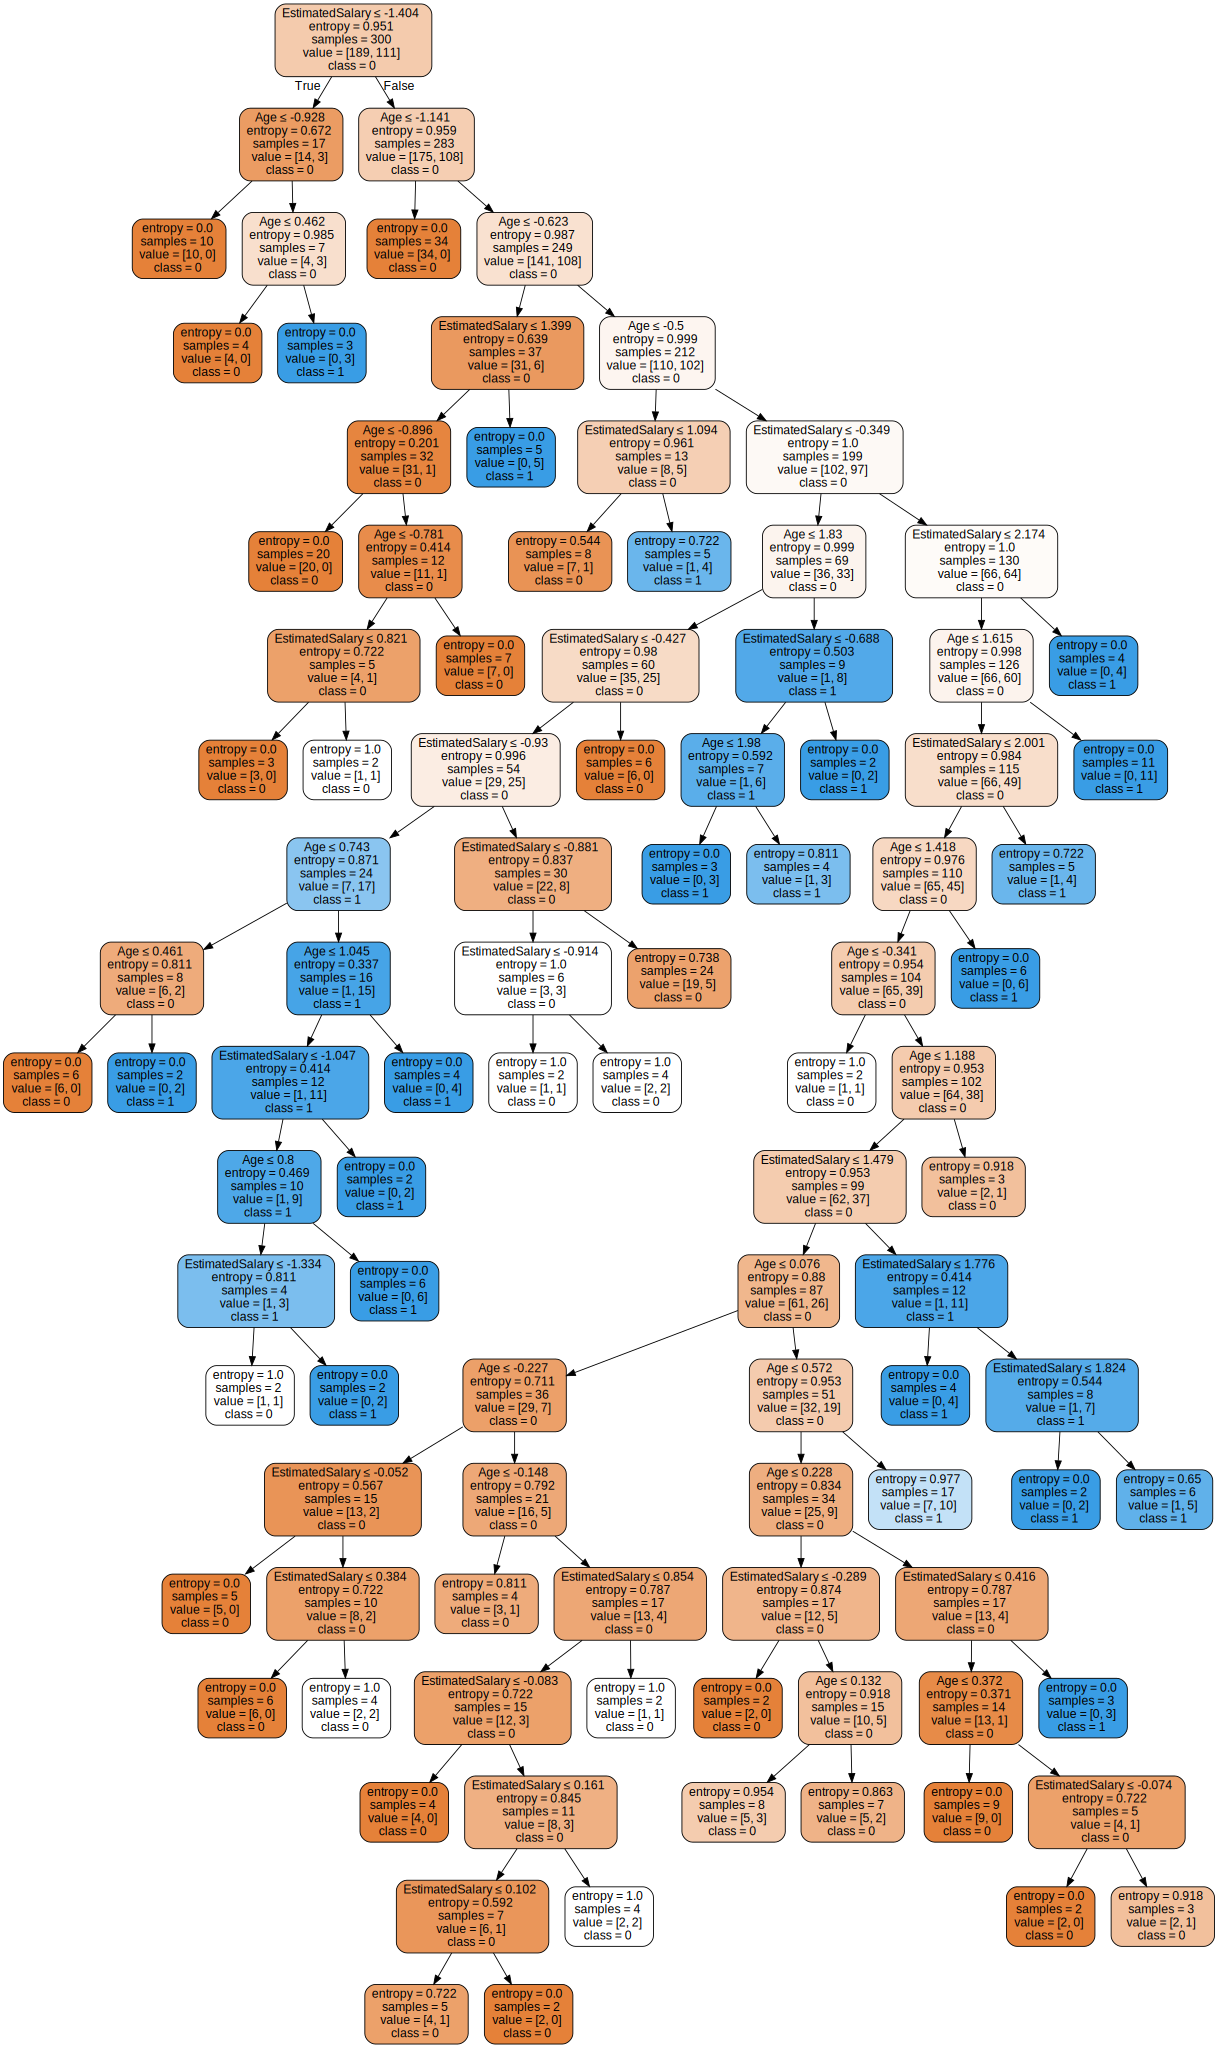

In [0]:
graph